In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Read data from processed csv file

In [2]:
data = pd.read_csv('data.csv')

##### display original data

In [3]:
data

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),...,IsAdopted,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
3,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190,...,False,Herding,6,Brightest,Small,12.53,17469,465,3698,Saver
4,A141142,A141142,Labrador Retriever,Black,Female,Bettie,2013-11-16 14:46:00,Stray,Aged,11825,...,False,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2023-11-21 11:21:00,Public Assist,Normal,2920,...,False,Toy,67,Fair,Small,16.50,22640,588,4594,High-End
85792,A893432,A893432,Chihuahua,Tan,Female,Coco,2023-11-21 11:21:00,Public Assist,Normal,2920,...,False,Toy,67,Fair,Small,16.50,22640,588,4594,High-End
85793,A893452,A893452,Maltese,White,Female,Sophie,2023-11-21 13:38:00,Public Assist,Normal,2555,...,False,Toy,59,Fair,Small,12.25,16073,650,2410,Saver
85794,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-11-22 14:26:00,Owner Surrender,Normal,30,...,False,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget


##### assign the IsAdopted colunm to y

In [4]:
y = data.iloc[:,16:17]

In [5]:
y

,IsAdopted
0,False
1,False
2,False
3,False
4,False
...,...
85791,False
85792,False
85793,False
85794,False


###### drop irrelevant data

In [6]:
X = data.iloc[:,:].drop(columns=["IsAdopted", "AnimalID", "ID", "Intake-DateTime","Color", "Breed","Outcome-DateTime", "Intelligence-Category", "Date-Of-Birth","Name", "Intake-Condition", "Category","Outcome-Subtype", "Intake-Age(days)", "Cost-Category", "Outcome-Type", "Intake-Type", "Outcome-Age(days)"])

In [7]:
X

,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Male,Adult,27,Large,9.00,18062,1725,5679
1,Male,Senior,27,Large,9.00,18062,1725,5679
2,Male,Senior,27,Large,9.00,18062,1725,5679
3,Male,Senior,6,Small,12.53,17469,465,3698
4,Female,Senior,7,Medium,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,Female,Senior,67,Small,16.50,22640,588,4594
85792,Female,Senior,67,Small,16.50,22640,588,4594
85793,Female,Senior,59,Small,12.25,16073,650,2410
85794,Female,Baby,7,Medium,12.04,18422,810,4819


##### convert literal data into numerical data

In [8]:
gender = X.groupby('Gender').size()

In [9]:
gender

Gender
Female    39792
Male      46004
dtype: int64

In [10]:
X['Gender'].replace(['Female','Male'], [0,1], inplace=True)

In [11]:
SizeCategory = X.groupby('Size-Category').size()

In [12]:
SizeCategory

Size-Category
Large     16531
Medium    44483
Small     24782
dtype: int64

In [13]:
X['Size-Category'].replace(['Large','Medium','Small'], [3,2,1], inplace=True)

In [14]:
Age = X.groupby('Age').size()

In [15]:
Age

Age
Adult     33272
Baby      18294
Senior     9581
Young     24649
dtype: int64

In [16]:
X['Age'].replace(['Baby','Young','Adult', 'Senior'], [1,2,3,4], inplace=True)

##### display final X set

In [17]:
X

,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,1,3,27,3,9.00,18062,1725,5679
1,1,4,27,3,9.00,18062,1725,5679
2,1,4,27,3,9.00,18062,1725,5679
3,1,4,6,1,12.53,17469,465,3698
4,0,4,7,2,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,0,4,67,1,16.50,22640,588,4594
85792,0,4,67,1,16.50,22640,588,4594
85793,0,4,59,1,12.25,16073,650,2410
85794,0,1,7,2,12.04,18422,810,4819


###### Step 1 Split the dataset into training and test sets (80, 20).

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###### Step 2(a) Use all the features to fit the linear regression model for feature (IsAdopted) using the training set.

In [19]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)

##### Step 2(b) Report the coefficients, mean squared error and variance score for the model on the test set.

In [20]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((y_pred - y_test)**2))
# Explained variance score : 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test , y_test))

Coefficients:  [[-3.07158608e-02 -1.10981310e-01 -3.89678507e-04  5.15590964e-02
  -9.68536484e-03  1.94337133e-05 -5.62516714e-05 -2.38455612e-05]]
Mean squared error: 0.24
Variance score: 0.05


##### Step 3(a) Use each feature alone - to fit a linear regression model on the training set.



##### Step 3(b) Report the coefficient, mean squared error and variance score for the model on the test set. Also report the plots of the linear regression models generated on each feature. Each plot should distinctly show the training points, test points and the linear regression line.

for fit on feature: Gender
Coefficients:  [[-0.03796025]]
Mean squared error: 0.25
Variance score: 0.00


for fit on feature: Age
Coefficients:  [[-0.11262788]]
Mean squared error: 0.24
Variance score: 0.05


for fit on feature: Intelligence-Ranking
Coefficients:  [[-0.00114872]]
Mean squared error: 0.25
Variance score: 0.00


for fit on feature: Size-Category
Coefficients:  [[0.04315412]]
Mean squared error: 0.25
Variance score: 0.00


for fit on feature: Longevity
Coefficients:  [[-0.00091931]]
Mean squared error: 0.25
Variance score: 0.00


for fit on feature: Total-Cost($)
Coefficients:  [[1.23590938e-06]]
Mean squared error: 0.25
Variance score: 0.00


for fit on feature: Purchase-Cost($)
Coefficients:  [[-6.32398618e-05]]
Mean squared error: 0.25
Variance score: -0.00


for fit on feature: Food-Cost($)
Coefficients:  [[2.89603818e-05]]
Mean squared error: 0.25
Variance score: 0.00




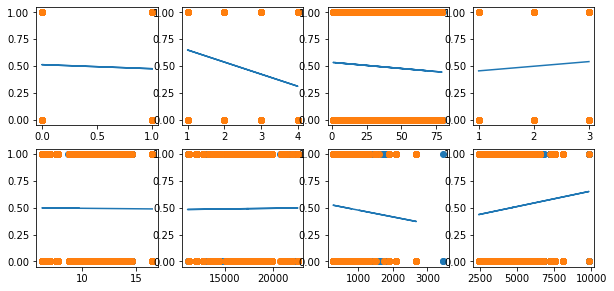

In [21]:
plt.figure(figsize=(10,10))
names=["Gender", "Age", "Intelligence-Ranking", "Size-Category", "Longevity", "Total-Cost($)", "Purchase-Cost($)", "Food-Cost($)"]
for i in range(8):
    plt.subplot(4, 4, i + 1)
    x=pd.DataFrame(X.iloc[:,i])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    y_pre =regr.predict(x_test)
    plt.scatter(x_train, y_train, label='train')
    plt.scatter(x_test, y_test, label='test')
    plt.plot(x_test.values.reshape(-1,1) , y_pre,label='line')
    print('for fit on feature: '+names[i])
    # The coefficients
    print('Coefficients: ', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % (np.sum((y_pre-y_test)**2)/len(y_test)))
    # Explained variance score : 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test,y_test))
    print('\n')
plt.show()

##### Step 4(a) Perform 10 iterations of (Step 1, Step 2(a), and Step 3(a)).

##### Step 4(b) • During each iteration of Step4(a), gather the metrics - mean squared error and variance score for the models on the test set  • For each feature, compute the average, over the 10 iterations, of each evaluation metric. Do the same for the metrics corresponding to ’all features’. 

In [22]:
coef_temp=[]
mse_all=[]
vs_all=[]
coef_feas = []
mse_feas = []
vs_feas = []
for j in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_predict=regr.predict(x_test)
    # The coefficients
    coef_temp.append(regr.coef_)
    # The mean squared error
    mse_all.append((np.sum((y_predict-y_test)**2)/len(y_test)))
    # Explained variance score : 1 is perfect prediction
    vs_all.append(regr.score(x_test,y_test))
for m in range(10):
    temp1 = []
    temp2 = []
    temp3 = []
    for i in range(8):
        x=pd.DataFrame(X.iloc[:,i])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        regr = LinearRegression()
        regr.fit(x_train, y_train)
        y_pre =regr.predict(x_test)        
        # The coefficients
        temp1.append(regr.coef_)
        # The mean squared error
        temp2.append((np.sum((y_pre-y_test)**2)/len(y_test)))
        # Explained variance score : 1 is perfect prediction
        temp3.append(regr.score(x_test,y_test))
    coef_feas.append(temp1)
    mse_feas.append(temp2)
    vs_feas.append(temp3)


In [23]:
coef_all=[]
coef=[]
mse=[]
vs=[]
for n in range(8):
    temp_all=0
    temp=0
    temp_mse=0
    temp_vs=0
    for a in range(10):
        temp_all+=coef_temp[a][0][n]
        temp += coef_feas[a][n]
        temp_mse+=mse_feas[a][n]
        temp_vs+=vs_feas[a][n]
    temp_all=temp_all/10
    temp=temp/10
    temp_mse=temp_mse/10
    temp_vs=temp_vs/10
    coef_all.append(temp_all)
    coef.append(temp)
    mse.append(temp_mse)
    vs.append(temp_vs)
    print('for feature: ' + names[n])
    print("Averange of coefficients: %.2f" % temp[0])
    print("Averange of mean squared error: %.2f" % mse[n])
    print("Averange of variance score: %.2f" % vs[n])
    print('\n')
print("for all features:")
print("Averange of coefficients:",coef_all)
print("Averange of mean squared error:%.2f" % (sum(mse_all) / len(mse_all)))
print("Averange of variance score:%.2f" % (sum(vs_all) / len(vs_all)))
print('\n')

for feature: Gender
Averange of coefficients: -0.04
Averange of mean squared error: 0.25
Averange of variance score: 0.00


for feature: Age
Averange of coefficients: -0.11
Averange of mean squared error: 0.24
Averange of variance score: 0.05


for feature: Intelligence-Ranking
Averange of coefficients: -0.00
Averange of mean squared error: 0.25
Averange of variance score: 0.00


for feature: Size-Category
Averange of coefficients: 0.04
Averange of mean squared error: 0.25
Averange of variance score: 0.00


for feature: Longevity
Averange of coefficients: -0.00
Averange of mean squared error: 0.25
Averange of variance score: -0.00


for feature: Total-Cost($)
Averange of coefficients: 0.00
Averange of mean squared error: 0.25
Averange of variance score: -0.00


for feature: Purchase-Cost($)
Averange of coefficients: -0.00
Averange of mean squared error: 0.25
Averange of variance score: 0.00


for feature: Food-Cost($)
Averange of coefficients: 0.00
Averange of mean squared error: 0.25


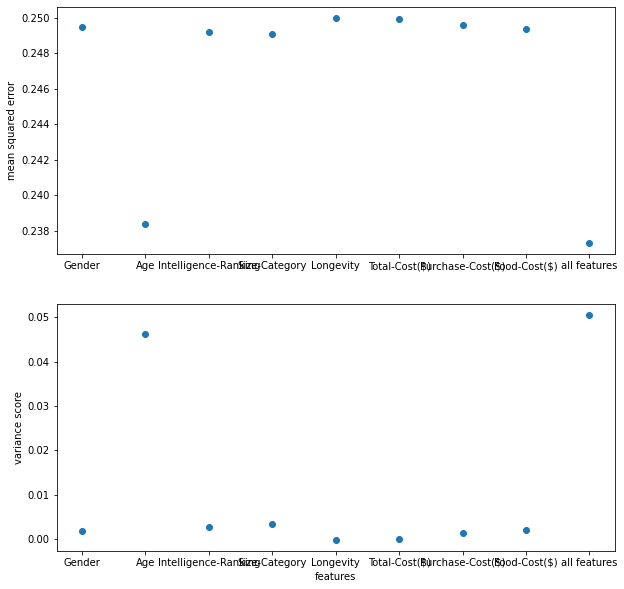

In [24]:
plt.figure(figsize=(10, 10))
names = names + ["all features"]
mse.append((sum(mse_all) / len(mse_all)))
vs.append((sum(vs_all) / len(vs_all)))
plt.subplot(2,1,1)
s1=plt.scatter(names,mse)
plt.ylabel('mean squared error')
plt.subplot(2,1,2)
s2=plt.scatter(names,vs)
plt.ylabel('variance score')
plt.xlabel('features')
plt.show()


# Conclusion & Discussion

#### From the linear regression model, we can see:
#### 1. Gender, Longevity, Total-Cost do not affect if the pet will be adopted. The line is quite flat.
#### 2. Intelligence-Ranking, Size-Category, Purchase-Cost have tiny effects on adoption. Intelligence-Ranking and Purchase-Cost have negative effects, meaning if a pet is less-intelligent and costs more, it has less chance to be adopted. Size-Category has the opposite positive effect.
#### 3. Age and Food-Cost have dramatic influence on adoption. If a pet is younger and costs less on food, it has a much bigger chance to be adopted.
#### 4. Age is the most predictive for the target feature. It has low averange of mean squared error and high averange of variance score.
#### 5. The model performs much better with all features rather than any individual ones. This quite makes sense since the model is better trained. Some feature fits the model quite well though some others do not have a quite reatively liner relationship.